In [2]:
from google.colab import drive
drive.mount ('/content/drive')
zip_path = '/content/drive/MyDrive/Capstone/Potholes.zip'
data_dir = '/tmp/potholedataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

Mounted at /content/drive


In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
source_path = '/tmp/potholedataset/Potholes'

source_path_normal = os.path.join(source_path, 'Normal')
source_path_pothole = os.path.join(source_path, 'Holes')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_normal))} images of normal.")
print(f"There are {len(os.listdir(source_path_pothole))} images of pothole.")

There are 1803 images of normal.
There are 1283 images of pothole.


In [4]:
# grader-required-cell

# Define root directory
root_dir = '/tmp/normal-v-holes'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """


  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  os.makedirs(os.path.join(root_path, 'training', 'Normal'))
  os.makedirs(os.path.join(root_path, 'training', 'Holes'))
  os.makedirs(os.path.join(root_path, 'validation', 'Normal'))
  os.makedirs(os.path.join(root_path, 'validation', 'Holes'))

  pass
  
  

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/normal-v-holes/validation
/tmp/normal-v-holes/training
/tmp/normal-v-holes/validation/Normal
/tmp/normal-v-holes/validation/Holes
/tmp/normal-v-holes/training/Normal
/tmp/normal-v-holes/training/Holes


In [6]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")
  
  # Step 2: Shuffle the files
  random.shuffle(files)

  # Step 3: Split the files into training and validation sets
  split_idx = int(len(files) * SPLIT_SIZE)
  train_files = files[:split_idx]
  validation_files = files[split_idx:]
  
  # Step 4: Copy the files into the appropriate directories
  for filename in train_files:
    this_file = SOURCE_DIR + filename
    destination = TRAINING_DIR + filename
    shutil.copyfile(this_file, destination)
    
  for filename in validation_files:
    this_file = SOURCE_DIR + filename
    destination = VALIDATION_DIR + filename
    shutil.copyfile(this_file, destination)
  pass


  

In [7]:
# grader-required-cell

# Test your split_data function

# Define paths

NORMAL_SOURCE_DIR = '/tmp/potholedataset/Potholes/Normal/'
POTHOLES_SOURCE_DIR = '/tmp/potholedataset/Potholes/Holes/'

TRAINING_DIR = "/tmp/normal-v-holes/training/"
VALIDATION_DIR = "/tmp/normal-v-holes/validation/"

TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "Normal/")
VALIDATION_NORMAL_DIR = os.path.join(VALIDATION_DIR, "Normal/")

TRAINING_HOLES_DIR = os.path.join(TRAINING_DIR, "Holes/")
VALIDATION_HOLES_DIR = os.path.join(VALIDATION_DIR, "Holes/")

In [8]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_NORMAL_DIR)) > 0:
  for file in os.scandir(TRAINING_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_HOLES_DIR)) > 0:
  for file in os.scandir(TRAINING_HOLES_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_NORMAL_DIR)) > 0:
  for file in os.scandir(VALIDATION_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HOLES_DIR)) > 0:
  for file in os.scandir(VALIDATION_HOLES_DIR):
    os.remove(file.path)


In [9]:
# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)
split_data(POTHOLES_SOURCE_DIR, TRAINING_HOLES_DIR, VALIDATION_HOLES_DIR, split_size)


In [10]:
# Your function should perform copies rather than moving images so original directories should contain unchanged images
#print(f"\n\nOriginal normal's directory has {len(os.listdir(NORMAL_SOURCE_DIR))} images")
#print(f"Original holes's directory has {len(os.listdir(HOLES_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")
print(f"There are {len(os.listdir(TRAINING_HOLES_DIR))} images of holes for training")
print(f"There are {len(os.listdir(VALIDATION_NORMAL_DIR))} images of normal for validation")
print(f"There are {len(os.listdir(VALIDATION_HOLES_DIR))} images of holes for validation")

There are 1622 images of normal for training
There are 1154 images of holes for training
There are 181 images of normal for validation
There are 129 images of holes for validation


In [11]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(300, 300))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(300, 300))
  ### END CODE HERE
  return train_generator, validation_generator

In [12]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2776 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [13]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([  
      # First Convolution layer with 32 filters and 3x3 kernel size
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      # Second Convolution layer with 64 filters and 3x3 kernel size
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Third Convolution layer with 128 filters and 3x3 kernel size
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the output layer to 1 dimension
      tf.keras.layers.Flatten(),
      # Add a hidden layer with 512 neurons and relu activation
      tf.keras.layers.Dense(512, activation='relu'),
      # Add output layer with sigmoid activation
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [14]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
139/139 [==============================] - 90s 561ms/step - loss: 0.6003 - accuracy: 0.7640 - val_loss: 0.2661 - val_accuracy: 0.9000
Epoch 2/20
139/139 [==============================] - 78s 562ms/step - loss: 0.3829 - accuracy: 0.8408 - val_loss: 0.6246 - val_accuracy: 0.5903
Epoch 3/20
139/139 [==============================] - 78s 558ms/step - loss: 0.3709 - accuracy: 0.8527 - val_loss: 0.1994 - val_accuracy: 0.9355
Epoch 4/20
139/139 [==============================] - 77s 550ms/step - loss: 0.2633 - accuracy: 0.8995 - val_loss: 0.1412 - val_accuracy: 0.9452
Epoch 5/20
139/139 [==============================] - 78s 563ms/step - loss: 0.2571 - accuracy: 0.9035 - val_loss: 0.1407 - val_accuracy: 0.9290
Epoch 6/20
139/139 [==============================] - 79s 567ms/step - loss: 0.2666 - accuracy: 0.9017 - val_loss: 0.1489 - val_accuracy: 0.9355
Epoch 7/20
139/139 [==============================] - 79s 570ms/step - loss: 0.2240 - accuracy: 0.9153 - val_loss: 0.1128 - val_ac

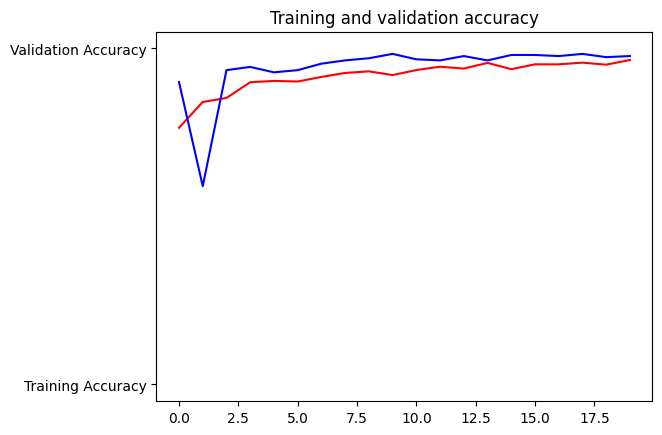

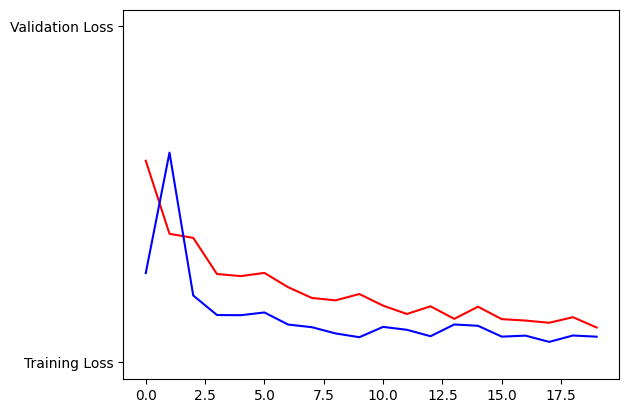

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [16]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(300, 300))
  
  x=img_to_array(img)
  x /= 255
  x= np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=20)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a pothole")
 

Saving 6.jpg to 6.jpg
1/1 [==============================] - 0s 265ms/step
[4.6348537e-13]
6.jpg is a pothole


In [17]:
model.save("model.h5")